### Задание 1.3.1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.


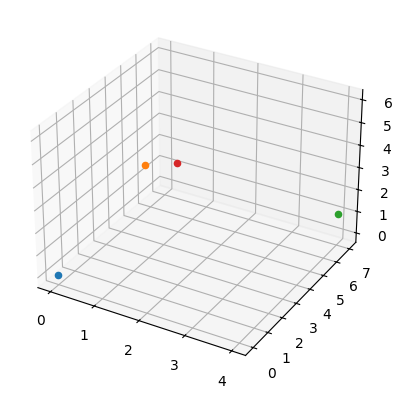

Евклидово расстояние:
a и b: 6.324555320336759
a и c: 8.12403840463596
a и d: 5.744562646538029
b и c: 8.831760866327848
b и d: 2.23606797749979
c и d: 6.708203932499369
Квадрат Евклидова расстояния:
a и b: 40.00000000000001
a и c: 66.00000000000001
a и d: 33.0
b и c: 78.00000000000001
b и d: 5.000000000000001
c и d: 45.00000000000001
Расстояние Чебышева:
a и b: 6.0
a и c: 7.0
a и d: 5.0
b и c: 7.0
b и d: 2.0
c и d: 5.0
Расстояние Хемминга:
a и b: 8.0
a и c: 12.0
a и d: 9.0
b и c: 14.0
b и d: 3.0
c и d: 11.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = np.array([0,0,0])
b = np.array([2,0,6])
c = np.array([4,7,1])
d = np.array([2,2,5])
ax.scatter(a[0], a[1], a[2])
ax.scatter(b[0], b[1], b[2])
ax.scatter(c[0], c[1], c[2])
ax.scatter(d[0], d[1], d[2])

plt.show()

print("Евклидово расстояние:")
print("a и b:", np.linalg.norm(a-b))
print("a и c:", np.linalg.norm(a-c))
print("a и d:", np.linalg.norm(a-d))
print("b и c:", np.linalg.norm(b-c))
print("b и d:", np.linalg.norm(b-d))
print("c и d:", np.linalg.norm(c-d))
print("Квадрат Евклидова расстояния:")
print("a и b:", np.linalg.norm(a-b)**2)
print("a и c:", np.linalg.norm(a-c)**2)
print("a и d:", np.linalg.norm(a-d)**2)
print("b и c:", np.linalg.norm(b-c)**2)
print("b и d:", np.linalg.norm(b-d)**2)
print("c и d:", np.linalg.norm(c-d)**2)
print("Расстояние Чебышева:")
print("a и b:", np.linalg.norm(a-b, ord=np.inf))
print("a и c:", np.linalg.norm(a-c, ord=np.inf))
print("a и d:", np.linalg.norm(a-d, ord=np.inf))
print("b и c:", np.linalg.norm(b-c, ord=np.inf))
print("b и d:", np.linalg.norm(b-d, ord=np.inf))
print("c и d:", np.linalg.norm(c-d, ord=np.inf))
print("Расстояние Хемминга:")
print("a и b:", np.linalg.norm(a-b, ord=1))
print("a и c:", np.linalg.norm(a-c, ord=1))
print("a и d:", np.linalg.norm(a-d, ord=1))
print("b и c:", np.linalg.norm(b-c, ord=1))
print("b и d:", np.linalg.norm(b-d, ord=1))
print("c и d:", np.linalg.norm(c-d, ord=1))

### Задание 1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания необходимо использовать функцию arange.

In [6]:
a = np.zeros([5,5])
a += np.arange(5)
print(a)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


### Задание 2.3.1
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты

In [ ]:
!pip install seaborn

accuracy: 0.967
accuracy: 1.0
accuracy: 0.967
accuracy: 1.0


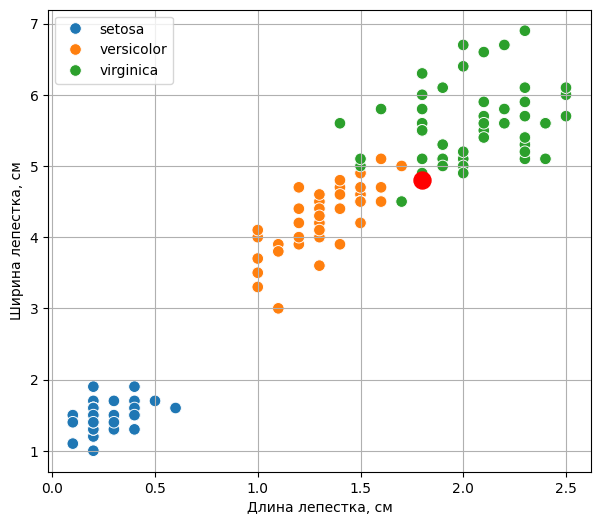

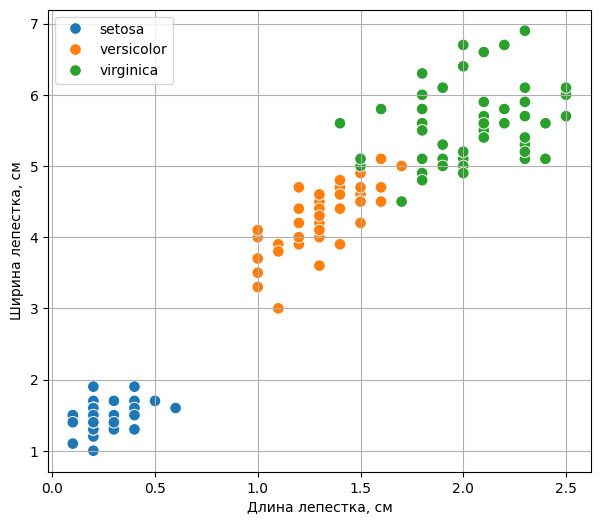

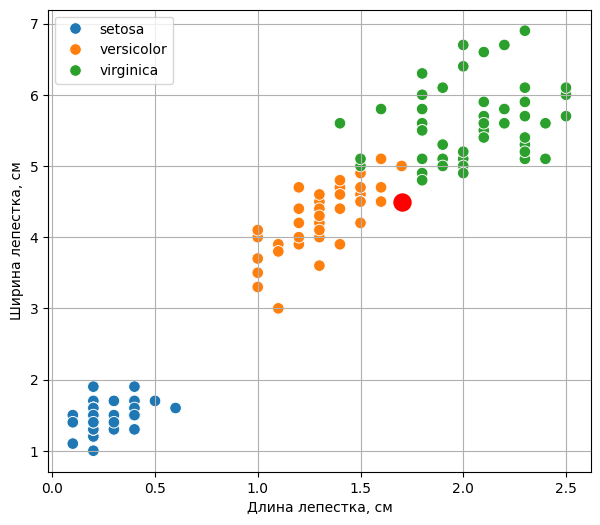

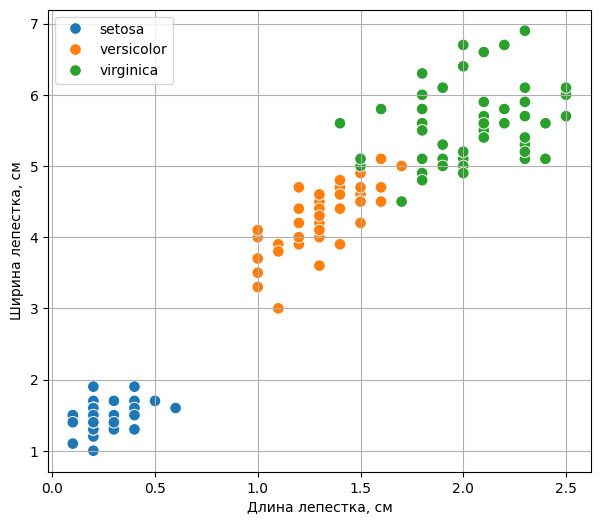

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')

from sklearn.model_selection import train_test_split

def train_and_evaluate_model(k, test_size):
  X_train, X_test, y_train, y_test = train_test_split(
      iris.iloc[:, :-1],
      iris.iloc[:, -1],
      test_size=test_size
  )

  X_train.shape, X_test.shape, y_train.shape, y_test.shape
  X_train.head()
  y_train.head()

  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred

  plt.figure(figsize=(7,6))
  sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
  plt.xlabel('Длина лепестка, см')
  plt.ylabel('Ширина лепестка, см')
  plt.legend(loc=2)
  plt.grid()

  for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
      plt.scatter(X_test.iloc[i,3], X_test.iloc[i,2], color='red',s=150)

  from sklearn.metrics import accuracy_score
  print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

# Эксперимент 1: k = 1
train_and_evaluate_model(1,0.20)
# Эксперимент 2: k = 5
train_and_evaluate_model(5,0.20)
# Эксперимент 3: k = 10
train_and_evaluate_model(10,0.20)
# Эксперимент 4: k = 4, test_size = 15%
train_and_evaluate_model(1,0.15)

### Задание 3.3.1
Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [9]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'цвет глаз': 1, 'вес': 70, 'возраст': 20},
             {'цвет глаз': 2, 'вес': 90, 'возраст': 40},
             {'цвет глаз': 3, 'вес': 80, 'возраст': 18},
             {'цвет глаз': 1, 'вес': 60, 'возраст': 21},]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
print(features)

[[70. 20.  1.]
 [90. 40.  2.]
 [80. 18.  3.]
 [60. 21.  1.]]
